<a href="https://colab.research.google.com/github/shinyarah/module2_week1/blob/main/Moringa_Data_Science_Core_Module2_W1_Independent_Project_2021_05_Wanjiru_Kinyara_Python_Notebook%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#defining the question

##a) specifyinh the question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)


b)defining the metric for success

##c) understanding the context

d) experimental design

#data preparation

##importing out libraries

In [ ]:

import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

##fifa results preview

In [ ]:
#loading the results dataset and having a look at it
fifa_results = pd.read_csv("/content/results.csv")
fifa_results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


In [ ]:
#fifa results head
fifa_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
X = fifa_results.iloc[:, 2:6].values
y = fifa_results.iloc[:, 6].values
print(X)
print(y)

[['England' 0 0 'Friendly']
 ['Scotland' 4 2 'Friendly']
 ['England' 2 1 'Friendly']
 ...
 ['Algeria' 0 1 'African Cup of Nations']
 ['North Korea' 0 1 'Intercontinental Cup']
 ['Fiji' 1 1 'Pacific Games']]
['Glasgow' 'London' 'Glasgow' ... 'Cairo' 'Ahmedabad' 'Apia']


In [ ]:
#fifa results tail
fifa_results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
fifa_results.info

<bound method DataFrame.info of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

In [ ]:
#shape of our fifa results 
fifa_results.shape

(40839, 9)

In [ ]:
qstn = fifa_results[['home_score','away_score','tournament']]
qstn.head()

,home_score,away_score,tournament
0,0,0,Friendly
1,4,2,Friendly
2,2,1,Friendly
3,2,2,Friendly
4,3,0,Friendly


##fifa ranking dataset preview

In [ ]:
#loading the fifa ranking dataset and having a look at it
fifa_ranking = pd.read_csv("/content/fifa_ranking.csv")
fifa_ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [ ]:
fifa_ranking.info

<bound method DataFrame.info of        rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]>

In [ ]:
#previewing the shape of our dataset
fifa_ranking.shape

(57793, 16)

In [ ]:
#here we are going to look at the the head of our fifa_ranking head
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
#now a look at fifa_ranking tail
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


#data cleaning

##fifa_results clean-up

In [ ]:
#checking for null values
fifa_results.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
#checking for duplicated values within our dataset

fifa_results.duplicated().sum()

0

##fifa_ranking dataset cleaning

In [ ]:
#checking for null values
fifa_ranking.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
#checking for duplicated values within our dataset

fifa_ranking.duplicated().sum()

37

In [ ]:
#let's have a look at our duplicates in order to figure out why they are duplicates and hence how to deal with them
fifa_ranking[fifa_ranking.duplicated()]

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11
42366,113,Sudan,SDN,292.03,292,0,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-05-09
42562,101,Sudan,SDN,338.25,292,12,179.70,179.70,209.32,104.66,7.08,2.12,258.83,51.77,CAF,2012-06-06
42775,105,Sudan,SDN,329.36,338,-4,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-07-04
42983,104,Sudan,SDN,329.36,329,1,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-08-08
43193,103,Sudan,SDN,331.79,329,1,169.05,169.05,187.77,93.88,108.13,32.44,182.11,36.42,CAF,2012-09-05


In [ ]:
#removing duplicates
def remove_duplicates()

SyntaxError: ignored

##merging the datasets

In [ ]:
fifa_results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [ ]:
fifa_results['date']= pd.to_datetime(fifa_results['date'])

In [ ]:
#required: year and month columns 
#converting date into a datetime
fifa_results['month'] = pd.DatetimeIndex(fifa_results['date']).month

In [ ]:
fifa_results['year'] = pd.DatetimeIndex(fifa_results['date']).year

In [ ]:
fifa_results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872


In [ ]:
#dropping unneccessary columns from our dataset fifa_results
fifa_results = fifa_results[['home_team','home_score','away_team','away_score','tournament','country','month','year','neutral']]
fifa_results.head()

,home_team,home_score,away_team,away_score,tournament,country,month,year,neutral
0,Scotland,0,England,0,Friendly,Scotland,11,1872,False
1,England,4,Scotland,2,Friendly,England,3,1873,False
2,Scotland,2,England,1,Friendly,Scotland,3,1874,False
3,England,2,Scotland,2,Friendly,England,3,1875,False
4,Scotland,3,England,0,Friendly,Scotland,3,1876,False


In [ ]:
fifa_results.tail()

,home_team,home_score,away_team,away_score,tournament,country,month,year,neutral
40834,American Samoa,8,Tahiti,1,Pacific Games,Samoa,7,2019,True
40835,Fiji,4,Solomon Islands,4,Pacific Games,Samoa,7,2019,True
40836,Senegal,0,Algeria,1,African Cup of Nations,Egypt,7,2019,True
40837,Tajikistan,0,North Korea,1,Intercontinental Cup,India,7,2019,True
40838,Papua New Guinea,1,Fiji,1,Pacific Games,Samoa,7,2019,True


now we do the same for out fifa_ranking dataset

In [ ]:
fifa_ranking.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
fifa_ranking['rank_date']= pd.to_datetime(fifa_ranking['rank_date'])

In [ ]:
#required: year and month columns 
#converting date into a datetime
fifa_ranking['month'] = pd.DatetimeIndex(fifa_ranking['rank_date']).month

In [ ]:
fifa_ranking['year'] = pd.DatetimeIndex(fifa_ranking['rank_date']).year


In [ ]:
fifa_ranking.head(1)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993


In [ ]:
#dropping unneccessary columns from our dataset fifa_ranking
fifa_ranking = fifa_ranking[['rank','country_full','confederation','month','year']]
fifa_ranking.head()

,rank,country_full,confederation,month,year
0,1,Germany,UEFA,8,1993
1,2,Italy,UEFA,8,1993
2,3,Switzerland,UEFA,8,1993
3,4,Sweden,UEFA,8,1993
4,5,Argentina,CONMEBOL,8,1993


fifa_ranking goes up to the year 2018 while fifa_results is up to the year 2019. this means that all results beyond 2018 need to be dropped

In [ ]:

#end of year ranking(month 12)
month_rank= fifa_ranking[fifa_ranking['month'] == 12]

#2018 rnkings
year_rank= fifa_ranking[(fifa_ranking['month'] == 6) & (fifa_ranking['year'] == 2018)]

df = [month_rank, year_rank]
rank = pd.concat(df)
rank.tail()

,rank,country_full,confederation,month,year
57788,206,Anguilla,CONCACAF,6,2018
57789,206,Bahamas,CONCACAF,6,2018
57790,206,Eritrea,CAF,6,2018
57791,206,Somalia,CAF,6,2018
57792,206,Tonga,OFC,6,2018


In [ ]:

rank.rename(columns = {'country_full':'country'}, inplace = True)

In [ ]:
#dropping results beyond 2018
results = fifa_results[fifa_results.year < 2019]
results.tail()

,home_team,home_score,away_team,away_score,tournament,country,month,year,neutral
40346,Yemen,0,Syria,1,Friendly,United Arab Emirates,12,2018,True
40347,South Korea,0,Saudi Arabia,0,Friendly,United Arab Emirates,12,2018,True
40348,Kyrgyzstan,2,Palestine,1,Friendly,Qatar,12,2018,True
40349,Philippines,2,Vietnam,4,Friendly,Qatar,12,2018,True
40350,Qatar,1,Iran,2,Friendly,Qatar,12,2018,False


In [ ]:
results = pd.merge(results, rank, how="right", on=["country", "year"])

In [ ]:
#according to the 2006–2018 calculation method
results = results[results.year > 2014]
results.head(13)

,home_team,home_score,away_team,away_score,tournament,country,month_x,year,neutral,rank,confederation,month_y
18466,Belgium,5.0,Cyprus,0.0,UEFA Euro qualification,Belgium,3.0,2015,False,1,UEFA,12
18467,DR Congo,1.0,Cameroon,1.0,Friendly,Belgium,6.0,2015,True,1,UEFA,12
18468,Belgium,3.0,Bosnia and Herzegovina,1.0,UEFA Euro qualification,Belgium,9.0,2015,False,1,UEFA,12
18469,Nigeria,0.0,DR Congo,2.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12
18470,Nigeria,3.0,Cameroon,0.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12
18471,Gabon,1.0,DR Congo,2.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12
18472,Belgium,3.0,Israel,1.0,UEFA Euro qualification,Belgium,10.0,2015,False,1,UEFA,12
18473,Belgium,3.0,Italy,1.0,Friendly,Belgium,11.0,2015,False,1,UEFA,12
18474,Colombia,1.0,Costa Rica,0.0,Friendly,Argentina,6.0,2015,True,2,CONMEBOL,12
18475,Argentina,0.0,Ecuador,2.0,FIFA World Cup qualification,Argentina,10.0,2015,False,2,CONMEBOL,12


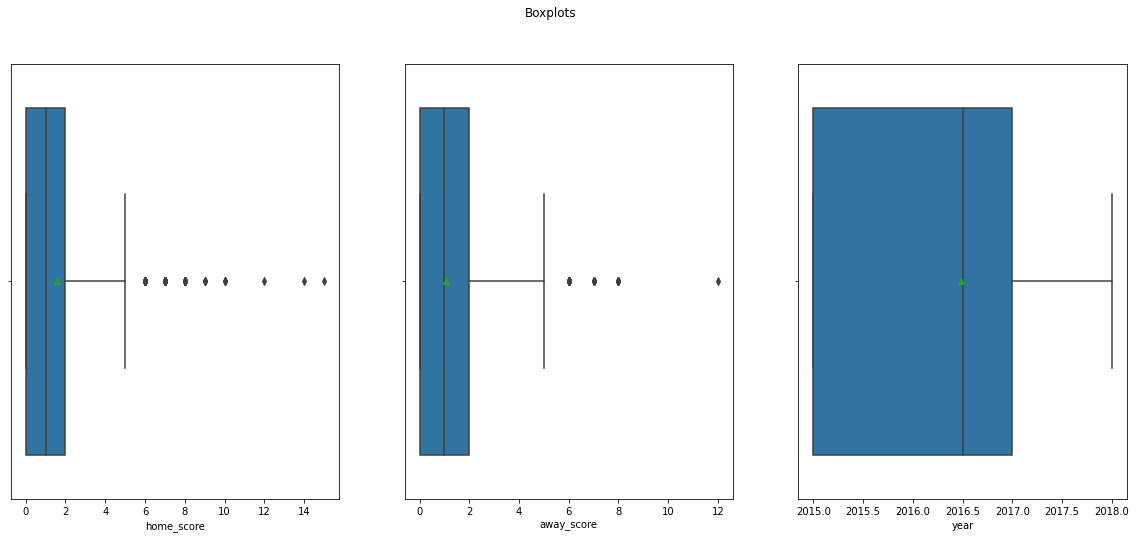

In [ ]:
#checking for Outliers and Anomalies in the numerical columns
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(20, 8))
fig.suptitle('Boxplots')
sns.boxplot(x = results['home_score'], ax=ax1, showmeans = True)
sns.boxplot(x = results['away_score'], ax=ax2, showmeans = True)
sns.boxplot(x = results['year'], ax=ax3, showmeans = True)



In [ ]:
#Dealing with anomalies
def outlier_determination(d_column):
 sorted(d_column)
 Q1,Q3 = np.percentile(d_column, [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
#outliers in home score
lowerbound,upperbound = outlier_determination(results.home_score)
print(lowerbound,upperbound)

nan nan


In [ ]:
lowerbound,upperbound = outlier_determination(results.away_score)
print(lowerbound,upperbound)

nan nan


In [ ]:
#removing outliers
results.drop(results[ (results.home_score > upperbound) | (results.home_score < lowerbound) ].index , inplace=True)

results.drop(results[ (results.home_score > upperbound) | (results.home_score < lowerbound) ].index , inplace=True)

In [ ]:
#new shape for resultts
results.shape

(3550, 12)

#Exploratory Data Analysis

In [ ]:
#univariate analysis
results.describe()

,home_score,away_score,month_x,year,rank,month_y
count,3342.000000,3342.000000,3342.000000,3550.000000,3550.000000,3550.000000
mean,1.571215,1.078097,7.095153,2016.485070,83.754366,10.532958
std,1.580576,1.270462,3.256000,1.121614,56.806786,2.579131
min,0.000000,0.000000,1.000000,2015.000000,1.000000,6.000000
25%,0.000000,0.000000,5.000000,2015.000000,35.000000,12.000000
50%,1.000000,1.000000,7.000000,2016.500000,75.000000,12.000000
75%,2.000000,2.000000,10.000000,2017.000000,124.000000,12.000000
max,15.000000,12.000000,12.000000,2018.000000,206.000000,12.000000


In [ ]:

#home score measures of central tendency and dispersion
print(f'Min: {results.home_score.min()}')
print(f'Q1: {results.home_score.quantile(.25)}')
print(f'Q2: {results.home_score.quantile(.50)}')
print(f'Q3: {results.home_score.quantile(.75)}')
print(f'Max: {results.home_score.max()}')
print('*'*15)

print(f'Mean: {results.home_score.mean()}')
print(f'Median: {results.home_score.median()}')
print(f'Mode: {results.home_score.mode().values[0]}')
print('*'*15)

print(f'Skew: {results.home_score.skew()}')
print(f'Kurtosis: {results.home_score.kurt()}')

Min: 0.0
Q1: 0.0
Q2: 1.0
Q3: 2.0
Max: 15.0
***************
Mean: 1.571214841412328
Median: 1.0
Mode: 1.0
***************
Skew: 1.7982608240013744
Kurtosis: 5.94148317400417


In [ ]:
#away score measures of central tendency and dispersion
print(f'Min: {results.away_score.min()}')
print(f'Q1: {results.away_score.quantile(.25)}')
print(f'Q2: {results.away_score.quantile(.50)}')
print(f'Q3: {results.away_score.quantile(.75)}')
print(f'Max: {results.away_score.max()}')
print('*'*15)

print(f'Mean: {results.away_score.mean()}')
print(f'Median: {results.away_score.median()}')
print(f'Mode: {results.away_score.mode().values[0]}')
print('*'*15)

print(f'Skew: {results.away_score.skew()}')
print(f'Kurtosis: {results.away_score.kurt()}')

Min: 0.0
Q1: 0.0
Q2: 1.0
Q3: 2.0
Max: 12.0
***************
Mean: 1.0780969479353681
Median: 1.0
Mode: 0.0
***************
Skew: 1.8083752108223807
Kurtosis: 5.3688198142673


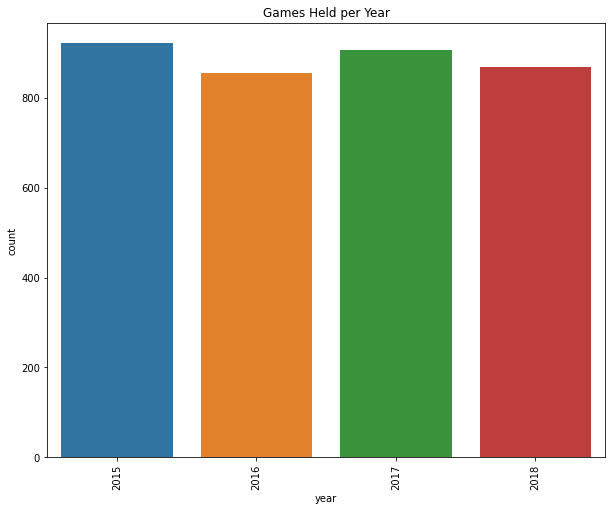

In [ ]:

#Count plots
plt.figure(figsize = [10,8])
sns.countplot(x='year',data=results)
plt.title('Games Held per Year')
plt.xticks(rotation = 90)
plt.show()

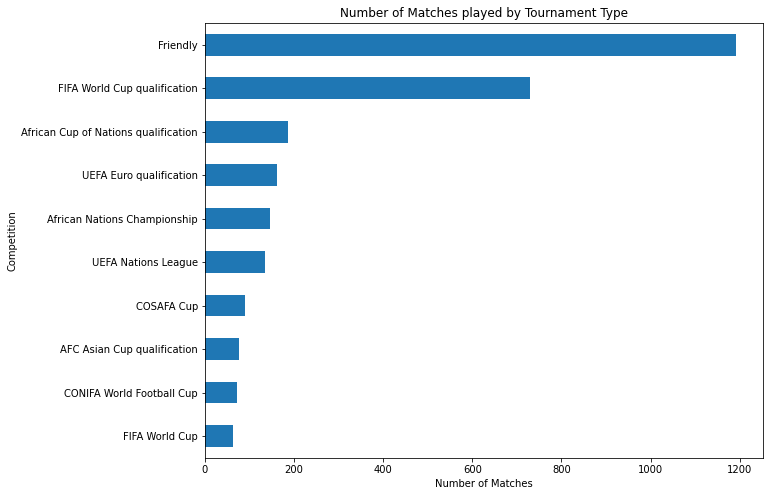

In [ ]:
#Tournaments Top 10
plt.figure(figsize = [10,8])
top_10 = results['tournament'].value_counts().sort_values(ascending=False).head(10)
top_10.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Matches')
plt.ylabel('Competition')
plt.title('Number of Matches played by Tournament Type')
plt.show()

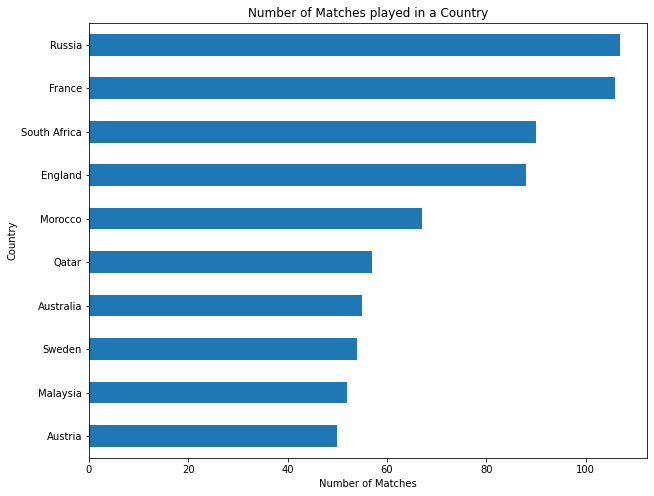

In [ ]:
#Country played in Top 10
plt.figure(figsize = [10,8])
top_10 = results['country'].value_counts().sort_values(ascending=False).head(10)
top_10.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Matches')
plt.ylabel('Country')
plt.title('Number of Matches played in a Country')
plt.show()

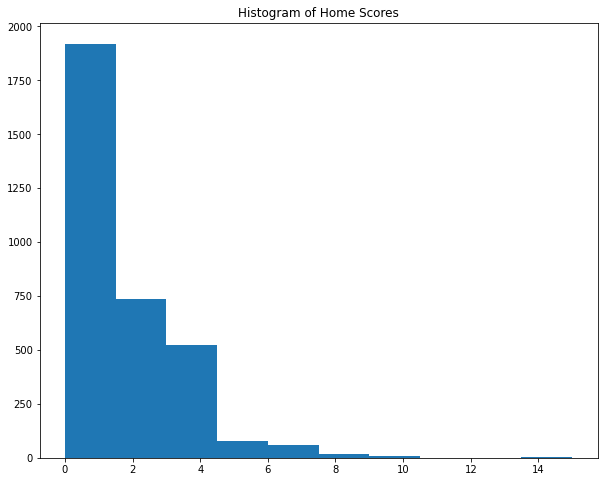

In [ ]:
#Histogram of home scores
plt.figure(figsize = [10,8])
plt.hist(results['home_score'])
plt.title('Histogram of Home Scores')
plt.show()

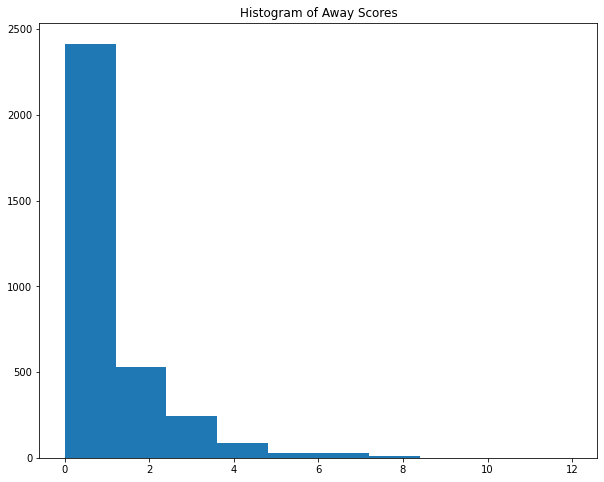

In [ ]:

#Histogram of away scores
plt.figure(figsize = [10,8])
plt.hist(results['away_score'])
plt.title('Histogram of Away Scores')
plt.show()

In [ ]:
neutral = pd.get_dummies(results['neutral'],drop_first=True)
neutral.rename(columns = {True:'neutral_encod'}, inplace = True)
neutral.head()

,neutral_encod
18466,0
18467,1
18468,0
18469,1
18470,1


In [ ]:
results.head(1)

,home_team,home_score,away_team,away_score,tournament,country,month_x,year,neutral,rank,confederation,month_y
18466,Belgium,5.0,Cyprus,0.0,UEFA Euro qualification,Belgium,3.0,2015,False,1,UEFA,12


In [ ]:
games = pd.concat([results,neutral],axis=1)
games.head()

,home_team,home_score,away_team,away_score,tournament,country,month_x,year,neutral,rank,confederation,month_y,neutral_encod
18466,Belgium,5.0,Cyprus,0.0,UEFA Euro qualification,Belgium,3.0,2015,False,1,UEFA,12,0
18467,DR Congo,1.0,Cameroon,1.0,Friendly,Belgium,6.0,2015,True,1,UEFA,12,1
18468,Belgium,3.0,Bosnia and Herzegovina,1.0,UEFA Euro qualification,Belgium,9.0,2015,False,1,UEFA,12,0
18469,Nigeria,0.0,DR Congo,2.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1
18470,Nigeria,3.0,Cameroon,0.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1


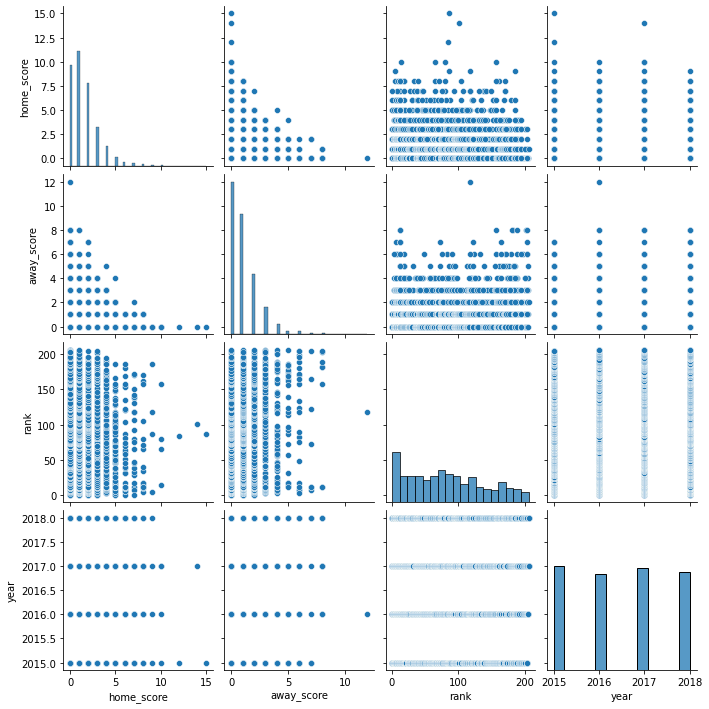

In [ ]:
sns.pairplot(games[['home_score', 'away_score', 'rank', 'year']])

In [ ]:
#finding correlations
games.corr()

,home_score,away_score,month_x,year,rank,month_y,neutral_encod
home_score,1.000000,-0.177985,0.024622,-0.017821,-0.106746,0.033063,-0.058312
away_score,-0.177985,1.000000,0.009201,-0.000260,0.138530,0.014654,0.082085
month_x,0.024622,0.009201,1.000000,0.018706,0.096745,-0.020623,-0.242696
year,-0.017821,-0.000260,0.018706,1.000000,-0.046266,-0.768494,0.052496
rank,-0.106746,0.138530,0.096745,-0.046266,1.000000,0.045081,-0.134744
month_y,0.033063,0.014654,-0.020623,-0.768494,0.045081,1.000000,-0.068825
neutral_encod,-0.058312,0.082085,-0.242696,0.052496,-0.134744,-0.068825,1.000000


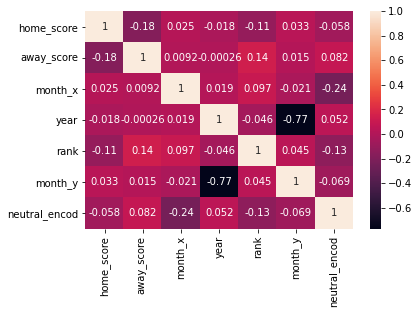

In [ ]:
#games correlation heatmap
sns.heatmap(games.corr(),annot=True)
plt.show()

##Feature engineering

In [ ]:
#reset index
games.reset_index(drop=True, inplace=True)

#creating a copy to work on
games1 = games.copy(deep=True)

In [ ]:
#have tournament type as only World Cup, Friendly and Other
games1.tournament = games1.tournament.apply(lambda x: x.strip())
games1.tournament = games1.tournament.apply(lambda x: 'World Cup' if x == 'FIFA World Cup qualification' else ( 'World Cup' if x == 'FIFA World Cup' else ('Friendly' if x == 'Friendly' else 'Other')))

AttributeError: ignored

#POLYNOMIAL REGRESSION MODEL

##MODEL 1

###multicolinearity

In [ ]:
games1.head()

,home_team,home_score,away_team,away_score,tournament,country,month_x,year,neutral,rank,confederation,month_y,neutral_encod
0,Belgium,5.0,Cyprus,0.0,UEFA Euro qualification,Belgium,3.0,2015,False,1,UEFA,12,0
1,DR Congo,1.0,Cameroon,1.0,Friendly,Belgium,6.0,2015,True,1,UEFA,12,1
2,Belgium,3.0,Bosnia and Herzegovina,1.0,UEFA Euro qualification,Belgium,9.0,2015,False,1,UEFA,12,0
3,Nigeria,0.0,DR Congo,2.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1
4,Nigeria,3.0,Cameroon,0.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1


In [ ]:

# predicting goals by the home team using home score as the deppendent variable

independent_home_goals = games1.drop(columns=['home_team', 'away_team', 'home_score', 'tournament'])
correlations_home_goals = independent_home_goals.corr()
correlations_home_goals

,away_score,month_x,year,rank,month_y,neutral_encod
away_score,1.000000,0.009201,-0.000260,0.138530,0.014654,0.082085
month_x,0.009201,1.000000,0.018706,0.096745,-0.020623,-0.242696
year,-0.000260,0.018706,1.000000,-0.046266,-0.768494,0.052496
rank,0.138530,0.096745,-0.046266,1.000000,0.045081,-0.134744
month_y,0.014654,-0.020623,-0.768494,0.045081,1.000000,-0.068825
neutral_encod,0.082085,-0.242696,0.052496,-0.134744,-0.068825,1.000000


In [ ]:

#computing the VIF score
pd.DataFrame(np.linalg.inv(correlations_home_goals.values), index = correlations_home_goals.index, 
             columns=correlations_home_goals.columns)

,away_score,month_x,year,rank,month_y,neutral_encod
away_score,1.031537,-0.021889,-0.032087,-0.155522,-0.040928,-0.112074
month_x,-0.021889,1.069631,-0.008563,-0.068104,0.036431,0.255172
year,-0.032087,-0.008563,2.444407,0.034545,1.877670,0.006119
rank,-0.155522,-0.068104,0.034545,1.048393,-0.010552,0.134963
month_y,-0.040928,0.036431,1.877670,-0.010552,2.450370,0.080856
neutral_encod,-0.112074,0.255172,0.006119,0.134963,0.080856,1.094558


the scores are less than 5. this means there is little multicolinearity 

###building the model

In [ ]:
from sklearn.model_selection import train_test_split

X = independent_home_goals.values
y = games1['home_score'].values

# Split the dataset into train and test sets
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

ValueError: ignored

In [ ]:
# let's check with 3 degrees of freedom

poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly_3 = poly_reg_3.fit_transform(X)

pol_3_reg = LinearRegression()
pol_3_reg.fit(X_poly_3, y)

y_pred_3 = pol_3_reg.predict(poly_reg_3.fit_transform(X_test))

ValueError: ignored

In [ ]:
# Now let's try with 4 degrees of freedom

poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly_4 = poly_reg_4.fit_transform(X)

pol_4_reg = LinearRegression()
pol_4_reg.fit(X_poly_4, y)

y_pred_4 = pol_4_reg.predict(poly_reg_4.fit_transform(X_test))

ValueError: ignored

In [ ]:
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))

# Since we have 4 features, we can use 4 degrees of freedom to avoid over or underfitting the model,
# since it has the lowest RMSE.

NameError: ignored

###cross validating the model

In [ ]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  Xc_train, Xc_test = X[train_index], X[test_index]
  yc_train, yc_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(Xc_train, yc_train)
  
  # assess the accuraccy of the model
  yc_pred = regressor.predict(Xc_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(yc_test, yc_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

# The means of the RMSEs are within the range of those we found in the Polynomial Regression Model we built.

we are using 5 folds

Training model 1


ValueError: ignored

###residual plots and heteroscedasticity using Bartletts's test

In [ ]:

residuals_home_score = np.subtract(y_pred_4, y_test)

pd.DataFrame(residuals_home_score).describe()

NameError: ignored

In [ ]:

plt.scatter(y_pred_4, residuals_home_score, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals_home_score.mean(), color='red', linewidth=1)
plt.show()

# The residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. 
# This shows that the model is fairly good

NameError: ignored

In [ ]:
# Let's be thorough though, and perform a heteroskedasticity test.
# For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,
# and the new hypothesis that the variance is different for at least one pair of datapoints.

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_4, residuals_home_score)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_4)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

NameError: ignored

##model 2

###multicolinearity

In [ ]:

# Model 2: Predict how many goals the home team scores. dependent variable here is away_score

independent_away_goals = games1.drop(columns=['home_team', 'away_team', 'away_score', 'tournament'])
correlations_away_goals = independent_away_goals.corr()
correlations_away_goals

,home_score,month_x,year,rank,month_y,neutral_encod
home_score,1.000000,0.024622,-0.017821,-0.106746,0.033063,-0.058312
month_x,0.024622,1.000000,0.018706,0.096745,-0.020623,-0.242696
year,-0.017821,0.018706,1.000000,-0.046266,-0.768494,0.052496
rank,-0.106746,0.096745,-0.046266,1.000000,0.045081,-0.134744
month_y,0.033063,-0.020623,-0.768494,0.045081,1.000000,-0.068825
neutral_encod,-0.058312,-0.242696,0.052496,-0.134744,-0.068825,1.000000


In [ ]:

# Let's use these correlations to compute the VIF score for each variable.
pd.DataFrame(np.linalg.inv(correlations_away_goals.values), index = correlations_away_goals.index, 
             columns=correlations_away_goals.columns)

,home_score,month_x,year,rank,month_y,neutral_encod
home_score,1.018720,-0.020932,-0.015221,0.121364,-0.046583,0.068270
month_x,-0.020932,1.069597,-0.008931,-0.073898,0.036520,0.251391
year,-0.015221,-0.008931,2.443636,0.027894,1.877093,0.001613
rank,0.121364,-0.073898,0.027894,1.039404,-0.022272,0.126199
month_y,-0.046583,0.036520,1.877093,-0.022272,2.450876,0.073287
neutral_encod,0.068270,0.251391,0.001613,0.126199,0.073287,1.086956


VIF scores are less than 5, hence little multicolinearity

###model building

In [ ]:
A = independent_away_goals.values
b = games1['away_score'].values

# Split the dataset into train and test sets
A_train, A_test, b_train, b_test = train_test_split(A,b, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
A_poly = poly_reg.fit_transform(A)

pol_reg = LinearRegression()
pol_reg.fit(A_poly, b)

b_pred = pol_reg.predict(poly_reg.fit_transform(A_test))

ValueError: ignored

In [ ]:
poly_reg_3 = PolynomialFeatures(degree = 3) 
A_poly_3 = poly_reg_3.fit_transform(A)

pol_3_reg = LinearRegression()
pol_3_reg.fit(A_poly_3, b)

b_pred_3 = pol_3_reg.predict(poly_reg_3.fit_transform(A_test))

ValueError: ignored

In [ ]:
poly_reg_4 = PolynomialFeatures(degree = 4) 
A_poly_4 = poly_reg_4.fit_transform(A)

pol_4_reg = LinearRegression()
pol_4_reg.fit(A_poly_4, b)

b_pred_4 = pol_4_reg.predict(poly_reg_4.fit_transform(A_test))

ValueError: ignored

In [ ]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred_3)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred_4)))

# Since we have 4 features, we can use 4 degrees of freedom to avoid over or underfitting the model,
# since it has the lowest RMSE.

NameError: ignored

###cross validation

In [ ]:

folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(A)) + ' folds')

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(A):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  Ac_train, Ac_test = A[train_index], A[test_index]
  bc_train, bc_test = b[train_index], b[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(Ac_train, bc_train)
  
  # assess the accuraccy of the model
  bc_pred = regressor.predict(Ac_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(bc_test, bc_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

# The means of the RMSEs are within the range of those we found in the Polynomial Regression Model we built.

we are using 5 folds

Training model 1


ValueError: ignored

both models don't have a widespread range. model 2 however has the lowest RMSEs

###residual plots and heteroscedasticity

In [ ]:
residuals_away_score = np.subtract(b_pred_4, b_test)

pd.DataFrame(residuals_away_score).describe()

NameError: ignored

In [ ]:
plt.scatter(b_pred_4, residuals_away_score, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals_away_score.mean(), color='red', linewidth=1)
plt.show()

# The residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. 
# This shows that the model is fairly good-

NameError: ignored

In [ ]:
# Let's be thorough though, and perform a heteroskedasticity test.
# For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,
# and the new hypothesis that the variance is different for at least one pair of datapoints.

import scipy as sp

test_result, p_value = sp.stats.bartlett(b_pred_4, residuals_away_score)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(b_pred_4)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

NameError: ignored

#LOGISTIC REGRESSION MODEL

##Feature engineering

In [ ]:
games1.head()

,home_team,home_score,away_team,away_score,tournament,country,month_x,year,neutral,rank,confederation,month_y,neutral_encod
0,Belgium,5.0,Cyprus,0.0,UEFA Euro qualification,Belgium,3.0,2015,False,1,UEFA,12,0
1,DR Congo,1.0,Cameroon,1.0,Friendly,Belgium,6.0,2015,True,1,UEFA,12,1
2,Belgium,3.0,Bosnia and Herzegovina,1.0,UEFA Euro qualification,Belgium,9.0,2015,False,1,UEFA,12,0
3,Nigeria,0.0,DR Congo,2.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1
4,Nigeria,3.0,Cameroon,0.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1


In [ ]:

# Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

def match_result(row):
  if row['home_score'] > row['away_score']:
    outcome = 'Win'
  elif row['home_score'] < row['away_score']:
    outcome = 'Lose'
  else:
    outcome = 'Draw'
  return outcome

games1['result'] = games1.apply(match_result, axis=1)
games1

,home_team,home_score,away_team,away_score,tournament,country,month_x,year,neutral,rank,confederation,month_y,neutral_encod,result
0,Belgium,5.0,Cyprus,0.0,UEFA Euro qualification,Belgium,3.0,2015,False,1,UEFA,12,0,Win
1,DR Congo,1.0,Cameroon,1.0,Friendly,Belgium,6.0,2015,True,1,UEFA,12,1,Draw
2,Belgium,3.0,Bosnia and Herzegovina,1.0,UEFA Euro qualification,Belgium,9.0,2015,False,1,UEFA,12,0,Win
3,Nigeria,0.0,DR Congo,2.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1,Lose
4,Nigeria,3.0,Cameroon,0.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,Anguilla,1.0,Saint Martin,2.0,Friendly,Anguilla,8.0,2018,False,206,CONCACAF,6,0,Lose
3546,NaN,NaN,NaN,NaN,NaN,Bahamas,NaN,2018,NaN,206,CONCACAF,6,0,Draw
3547,NaN,NaN,NaN,NaN,NaN,Eritrea,NaN,2018,NaN,206,CAF,6,0,Draw
3548,NaN,NaN,NaN,NaN,NaN,Somalia,NaN,2018,NaN,206,CAF,6,0,Draw


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
games1['result'] = labelencoder.fit_transform(games1['result'])
games1

,home_team,home_score,away_team,away_score,tournament,country,month_x,year,neutral,rank,confederation,month_y,neutral_encod,result
0,Belgium,5.0,Cyprus,0.0,UEFA Euro qualification,Belgium,3.0,2015,False,1,UEFA,12,0,2
1,DR Congo,1.0,Cameroon,1.0,Friendly,Belgium,6.0,2015,True,1,UEFA,12,1,0
2,Belgium,3.0,Bosnia and Herzegovina,1.0,UEFA Euro qualification,Belgium,9.0,2015,False,1,UEFA,12,0,2
3,Nigeria,0.0,DR Congo,2.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1,1
4,Nigeria,3.0,Cameroon,0.0,Friendly,Belgium,10.0,2015,True,1,UEFA,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,Anguilla,1.0,Saint Martin,2.0,Friendly,Anguilla,8.0,2018,False,206,CONCACAF,6,0,1
3546,NaN,NaN,NaN,NaN,NaN,Bahamas,NaN,2018,NaN,206,CONCACAF,6,0,0
3547,NaN,NaN,NaN,NaN,NaN,Eritrea,NaN,2018,NaN,206,CAF,6,0,0
3548,NaN,NaN,NaN,NaN,NaN,Somalia,NaN,2018,NaN,206,CAF,6,0,0


##building the model

In [ ]:

C = games1.drop(columns= ['home_team',	'away_team', 'tournament', 'result'])
d = games1['result']

from sklearn.model_selection import train_test_split
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size = .2, random_state=20)

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(C_train, d_train)

d_pred = LogReg.predict(C_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(d_test, d_pred)
confusion_matrix

ValueError: ignored

##hyperparameter testing

In [ ]:

# Alternative Solution

# scaling data as advised by the warning after running the previous cell.
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(C_train, d_train)
C_train = scaler.transform(C_train)

# Creating the logistic regression to improve the regression as suggested by the warning
# after running the previous cell.

logistic = linear_model.LogisticRegression()

ValueError: ignored

In [ ]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
hyp_C = np.logspace(0, 4, 10)

solver = [ 'liblinear', 'sag', 'saga']

# Creating hyperparameter options
hyperparameters = dict(C=hyp_C, penalty=penalty, solver = solver, max_iter = (10,100))

# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fitting grid search
best_model = clf.fit(C_train, d_train)

NameError: ignored

In [ ]:

# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter'])

NameError: ignored

In [ ]:
# Predicting target vector
best_model.predict(C)

NameError: ignored

In [ ]:
# Creating the logistic regression
logistic = linear_model.LogisticRegression().fit(X_train,y_train)
metrics.accuracy_score(d_test, d_pred)

ValueError: ignored

In [ ]:

logistic = linear_model.LogisticRegression(penalty='l1', C=1, max_iter=10, solver='saga').fit(C_train,d_train)

dc_pred = logistic.predict(C_test)
metrics.accuracy_score(d_test, dc_pred)

ValueError: ignored

In [ ]:

best_model.best_score_

NameError: ignored

#CONCLUSION
The logistic regression was able to split results into win, lose and draw hence providing a 100% accuracy

we did have the right data and the right question for this dataset